In [54]:
import pandas as pd
import mysql.connector
from mysql.connector import Error

import mysql.connector

mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="waleedahmed",
  database="us_boxing"
)

In [48]:
import pandas as pd
cur = mydb.cursor()
warehouse = "SELECT sku,stock,date_archive FROM warehouse_stock_archive"
cur.execute(warehouse)
warehouse= pd.DataFrame(data=cur.fetchall(),columns=['sku','stock','date'])
warehouse.head()

,sku,stock,date
0,ADHBG100-B/G12,1,2019-10-24 05:18:21
1,ADHBG100-B/R12,1,2019-10-24 05:18:21
2,ADHTG300-R/B12,5,2019-10-24 05:18:21
3,ADIH200PL-BLUE/R14,1,2019-10-24 05:18:21
4,ADIACC052K-BG,3,2019-10-24 05:18:21


In [49]:
conditions = [
    (warehouse['stock']==0),
    (warehouse['stock']!=0)]
values = ['out_of_stock', 'in_stock']
import numpy as np
warehouse['stock_status'] = np.select(conditions, values)

In [38]:
warehouse['date']=pd.to_datetime(warehouse['date']).dt.floor('d')
#df['Date'] = pd.to_datetime(df['Date']).dt.floor('d')

In [39]:
grouped=warehouse.groupby(['sku','date','stock_status'])['stock'].sum()

In [40]:
grouped=pd.DataFrame(grouped)
grouped.reset_index(inplace=True)
grouped.columns=['sku','date','status','stocks']

In [41]:
grouped['date_diff']=grouped.date.diff().dt.days

In [42]:
grouped.head(50)

,sku,date,status,stocks,date_diff
0,0333-70STEAMIBOARDV2,2019-10-24,in_stock,9,NaN
1,033370STEAMIRBOARDV2,2019-10-24,out_of_stock,0,0.0
2,0333BHS675/03,2019-10-24,out_of_stock,0,0.0
3,0333BT5200/15,2019-10-24,out_of_stock,0,0.0
4,0333FC6167/01,2019-10-24,out_of_stock,0,0.0
5,0333GC1440/26,2019-10-24,out_of_stock,0,0.0
6,0333GC350/46,2019-10-24,out_of_stock,0,0.0
7,0333GC3929/66,2019-10-24,out_of_stock,0,0.0
8,0333HD3119/60,2019-10-24,out_of_stock,0,0.0
9,0333HD4825/91,2019-10-24,out_of_stock,0,0.0


In [50]:
df=grouped[grouped['sku'].isin(['0U-014X-8XHX'])]

In [51]:
import seaborn as sns

In [61]:
df.head(50)
df['year']=df['date'].dt.year

<ipython-input-61-5e484a0db830>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year']=df['date'].dt.year


In [56]:
import matplotlib.pyplot as plt

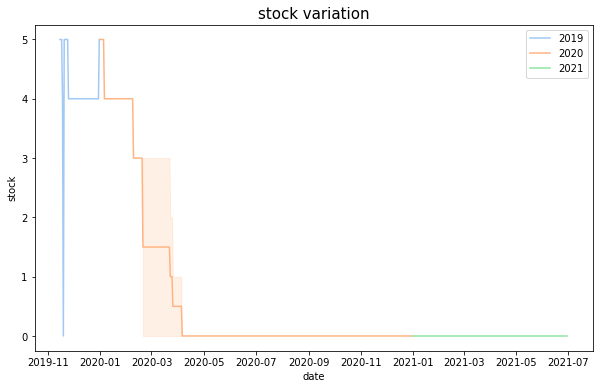

In [62]:
line,ax = plt.subplots(figsize=(10,6))
ax = sns.lineplot(x="date", y="stocks", data=df,palette="pastel",hue='year')
ax.set_title("stock variation", fontsize=15)
ax.set_xlabel ("date")
ax.set_ylabel ("stock")
ax.legend (loc="upper right");